# 📊 QuantStat: Financial Modeling & Statistical Analysis

A quantitative research project focused on **Mathematical Modeling** and **Statistical Arbitrage** for various financial assets, including Forex (EUR/USD).

---

## 🚀 Project Overview
This project transforms raw financial time-series data into actionable insights by applying the principles of **Normal Distribution** and **Mean Reversion**. It provides a framework to quantify market noise and identify statistically significant price deviations.

### **Key Features**
* 📉 **Statistical Profiling:** Automatic calculation of $\mu$ (Mean) and $\sigma$ (Volatility).
* ⚖️ **Distribution Testing:** Analyzing Skewness, Kurtosis, and Normality (Jarque-Bera Test).
* 🚨 **Signal Generation:** $Z$-Score based alerts for Overbought/Oversold conditions.

---

## 🧬 Mathematical Foundation
The project assumes that asset returns follow a **Stochastic Process** (Random Walk) represented by the following equation:

$$r_t = \mu + \sigma \epsilon_t$$

**Where:**
* $r_t$: Asset return at time $t$.
* $\mu$: Expected average return (Drift).
* $\sigma$: Standard deviation of returns (Volatility/Risk).
* $\epsilon_t$: Random shock or noise following a Standard Normal Distribution $\sim N(0,1)$.

---

## 🛠️ Tech Stack & Installation
* **Language:** Python 3.x
* **Core Libraries:** `pandas`, `numpy`, `matplotlib`, `seaborn`, `yfinance`


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
column_names = ['datetime', 'open', 'high', 'low', 'close', 'volume']
df_eur = pd.read_csv('data/EURUSD1440.csv', sep='\t', names=column_names, parse_dates=['datetime'], index_col='datetime')
df_eur

,open,high,low,close,volume
datetime,,,,,
2009-06-03,1.42030,1.42310,1.41085,1.41420,394952
2009-06-04,1.41415,1.42410,1.40700,1.41675,956402
2009-06-05,1.41675,1.42675,1.39325,1.39650,746305
2009-06-07,1.39680,1.39770,1.39268,1.39745,19136
2009-06-08,1.39745,1.40020,1.38050,1.39285,829437
...,...,...,...,...,...
2025-06-09,1.14063,1.14391,1.13864,1.14261,98869
2025-06-10,1.14260,1.14475,1.13729,1.14372,114622
2025-06-11,1.14375,1.15129,1.14052,1.15099,107094


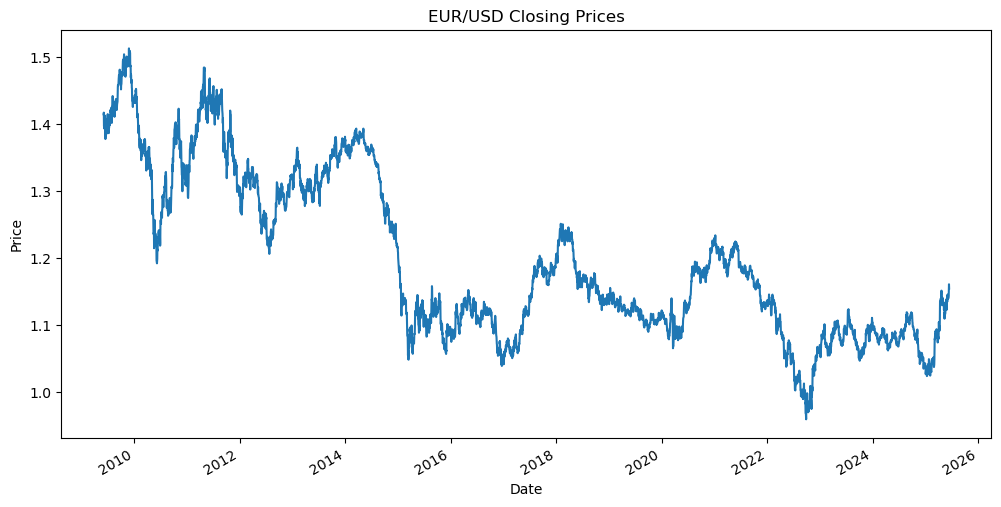

In [4]:
df_eur['close'].plot(figsize=(12, 6))
plt.title('EUR/USD Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [5]:
df_eur['pct_change'] = df_eur['close'].pct_change()
df_eur = df_eur.dropna()
df_eur

,open,high,low,close,volume,pct_change
datetime,,,,,,
2009-06-04,1.41415,1.42410,1.40700,1.41675,956402,0.001803
2009-06-05,1.41675,1.42675,1.39325,1.39650,746305,-0.014293
2009-06-07,1.39680,1.39770,1.39268,1.39745,19136,0.000680
2009-06-08,1.39745,1.40020,1.38050,1.39285,829437,-0.003292
2009-06-09,1.39285,1.41010,1.38520,1.40620,757583,0.009585
...,...,...,...,...,...,...
2025-06-09,1.14063,1.14391,1.13864,1.14261,98869,0.001753
2025-06-10,1.14260,1.14475,1.13729,1.14372,114622,0.000971
2025-06-11,1.14375,1.15129,1.14052,1.15099,107094,0.006356


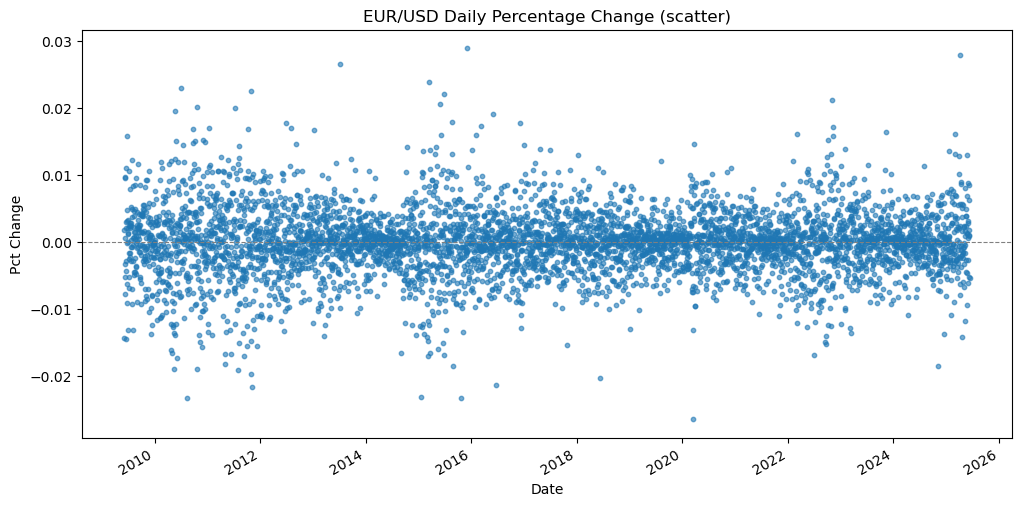

In [6]:
plt.figure(figsize=(12, 6))
plt.scatter(df_eur.index, df_eur['pct_change'], s=10, alpha=0.6, color='tab:blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('EUR/USD Daily Percentage Change (scatter)')
plt.xlabel('Date')
plt.ylabel('Pct Change')
plt.gcf().autofmt_xdate()
plt.show()

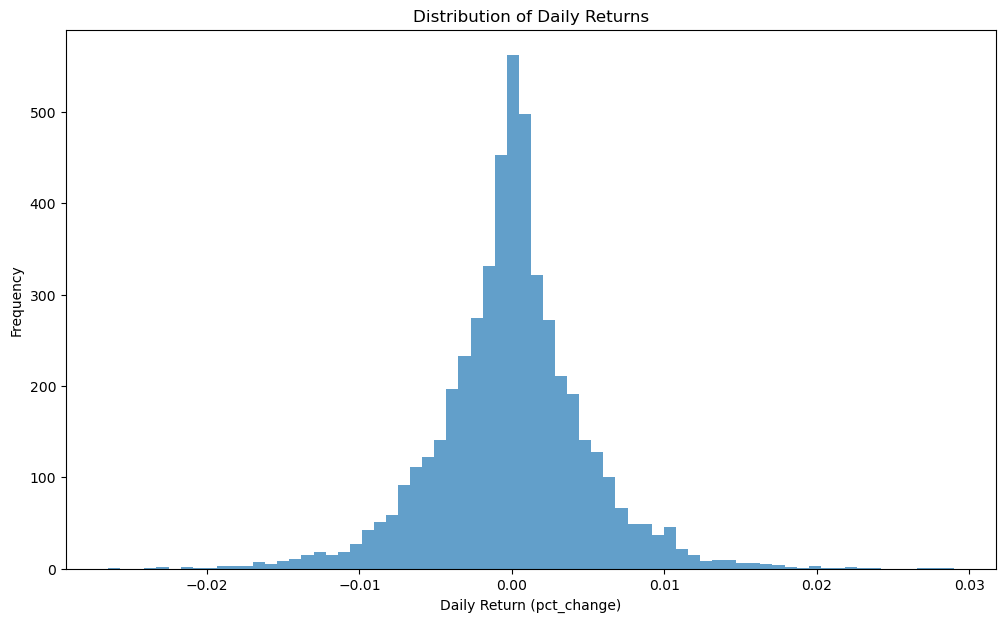

In [7]:
plt.figure(figsize=(12, 7))
plt.hist(df_eur['pct_change'].dropna(),bins=70, color='tab:blue', alpha=0.7)

plt.xlabel('Daily Return (pct_change)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')

plt.show()

## Check if it's a normal distribution

- by Jarque-Bera test and QQ plot ถ้ามันกระจายตัวเหมือนที่คาดหวังไหม

In [9]:
import scipy.stats as stats

========= Statistical Analysis =========
Skewness: 0.0519
Kurtosis: 2.8060
Jarque-Bera Stat: 1642.4752
P-Value: 0.0000

Result: NOT a Normal Distribution (Reject H0)


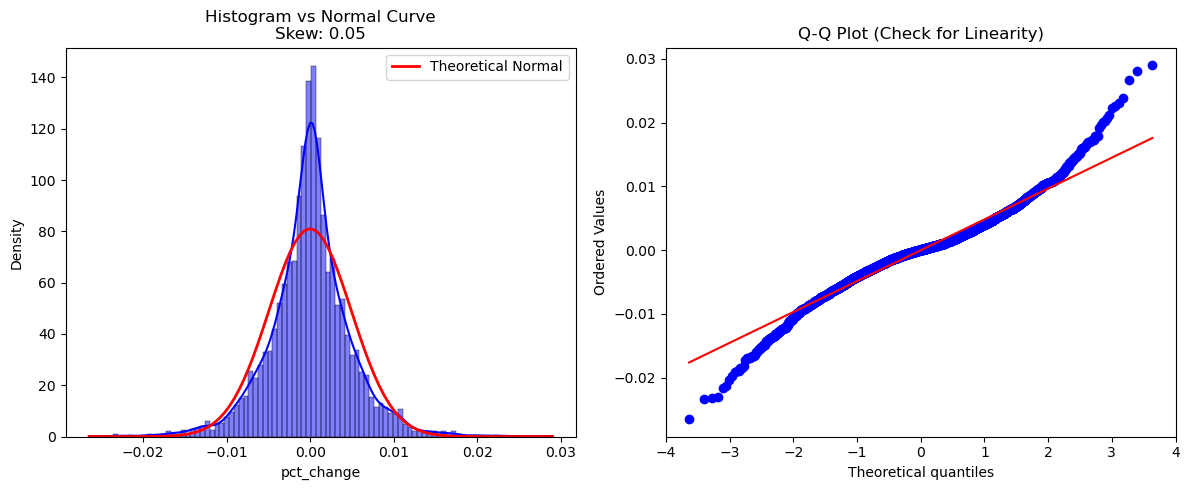

In [13]:
returns = df_eur['pct_change'].dropna()

# calculate skewness and kurtosis
skewness = returns.skew()
kurtosis = returns.kurtosis() 

# 2.  (Jarque-Bera Test)
# to test whether the skewness and kurtosis match a Normal Distribution
# if it's a normal distribution, skewness = 0 and kurtosis = 3
jb_stat, jb_p_value = stats.jarque_bera(returns)

print(f"{' Statistical Analysis ':=^40}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Jarque-Bera Stat: {jb_stat:.4f}")
print(f"P-Value: {jb_p_value:.4f}")

if jb_p_value < 0.05:
    print("\nResult: NOT a Normal Distribution (Reject H0)")
else:
    print("\nResult: Normal Distribution (Fail to reject H0)")


plt.figure(figsize=(12, 5))

# graph 1: Histogram vs Normal Curve
plt.subplot(1, 2, 1)
sns.histplot(returns, kde=True, color='blue', stat="density")
#  plot normal distribution curve
mu, std = returns.mean(), returns.std()
x = np.linspace(returns.min(), returns.max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Theoretical Normal')
plt.title(f'Histogram vs Normal Curve\nSkew: {skewness:.2f}')
plt.legend()

# graph 2: Q-Q Plot (if Normal will be linear)
plt.subplot(1, 2, 2)
stats.probplot(returns, dist="norm", plot=plt)  # compare with normal distribution
plt.title('Q-Q Plot (Check for Linearity)')

plt.tight_layout()
plt.show()